3. (35%) Implemente el método de RK4 para sistemas de ecuaciones de primer orden y póngalo a prueba en el siguiente PVI:
\begin{matrix}
  x'=x^{-2}+log(y)+t^2 & x(2)= -2 \\
  y'=e^y-cos(x)+sin(t)x-(xy)^{-3} & y(2)=1 \\
\end{matrix}

  Considere el intervalo $(1,2)$ para la solución.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def approximate(method, h, t0, tf, Y0):
    t_values = np.arange(t0, tf + h, h)
    Y_values = [np.array(Y0)]

    for t in t_values[:-1]:
        Y_values.append(method(t, Y_values[-1], h))

    return np.array(t_values), np.array(Y_values)


def plot_results(t_values, Y_values, h, method_name):
    """Generates plots with improved aesthetics."""
    plt.figure(figsize=(10, 6))
    plt.title(method_name, fontsize=14, fontweight="bold")
    plt.xlabel("Time (t)", fontsize=12)
    plt.ylabel("Function values", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.plot(t_values, Y_values[:, 0], label=f"x1 (h={h})", marker="o", markersize=3)
    plt.plot(
        t_values,
        Y_values[:, 1],
        label=f"x2 (h={h})",
        linestyle="dashed",
        marker="s",
        markersize=3,
    )

    plt.legend()
    plt.show()

In [43]:
def simulate(method, h_values, t0, tf, Y0):
    """Simulates the numerical method over a range of step sizes."""
    method_name = method.__name__.replace("_", " ").title()
    for h in h_values:
        t_values, Y_values = approximate(method, h, t0, tf, Y0)
        plot_results(t_values, Y_values, h, method_name)


In [44]:
def dY(t, Y):
    x1, x2 = Y
    dx_dt = x1**-2 + np.log(x2) + t**2
    dy_dt = np.exp(x2) - np.cos(x1) + np.sin(t) * x1 - (x1 * x2) ** -3
    return np.array([dx_dt, dy_dt])

In [45]:
def runge_kutta_4_stage(t, Yj, h):
    """4-stage Runge-Kutta method"""
    k1 = dY(t, Yj)
    k2 = dY(t + h / 2, Yj + h / 2 * k1)
    k3 = dY(t + h / 2, Yj + h / 2 * k2)
    k4 = dY(t + h, Yj + h * k3)

    # Combine stages to compute next step
    phi = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return Yj + h * phi


/tmp/ipykernel_25382/3690720229.py:4: RuntimeWarning: overflow encountered in exp
  dy_dt = np.exp(x2) - np.cos(x1) + np.sin(t) * x1 - (x1 * x2) ** -3
/tmp/ipykernel_25382/3690720229.py:4: RuntimeWarning: invalid value encountered in cos
  dy_dt = np.exp(x2) - np.cos(x1) + np.sin(t) * x1 - (x1 * x2) ** -3


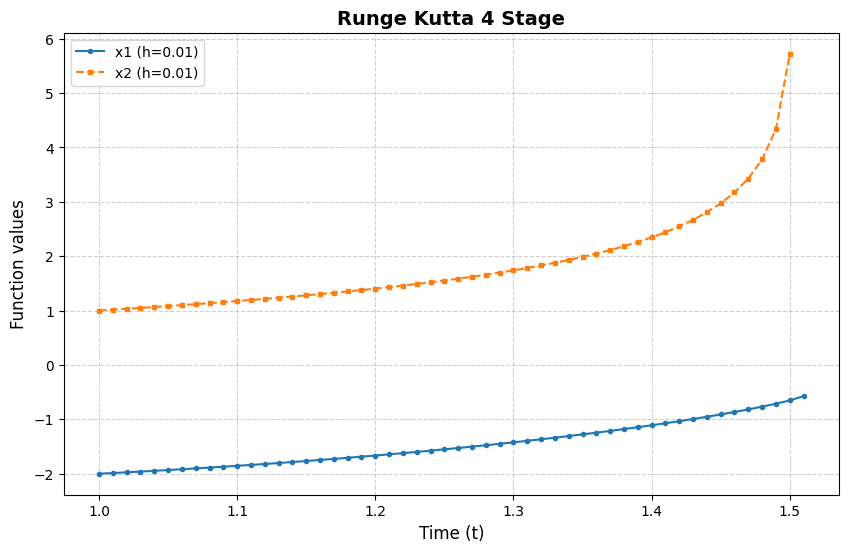

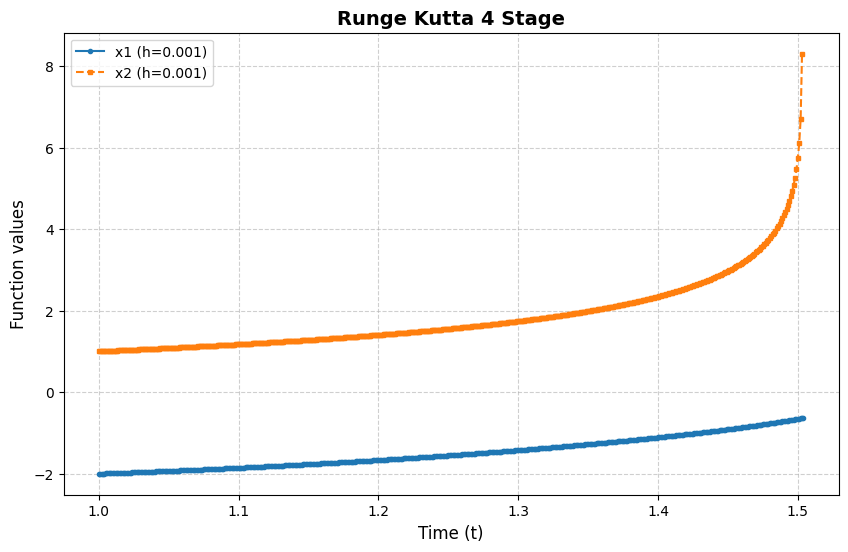

In [46]:
simulate(runge_kutta_4_stage, [0.01, 0.001], t0=1, tf=2, Y0=[-2.0, 1.0])